# Calculate resource requirements for different formulations

In [1]:
from modules.helper_functions_tsp import find_problem_size
import numpy as np
import math
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
LAYERS = 2
MIN_SIZE = 4
MAX_SIZE = 64
STEP = 2
from modules.config import GRAPH_DIR
GRAPH_FILE_NAME = 'binary_variables.png'

In [3]:
def calculate_ml_network_size(binary_variables, layers=LAYERS):
    fc_weights = binary_variables**2 * layers
    bias_weights = binary_variables * layers
    total_weights = fc_weights + bias_weights
    return(total_weights)

In [4]:
def calculate_combinations(n):
    fact = math.factorial(n-1)
    return (fact / 2)

In [5]:
array_size = 1 +(MAX_SIZE-MIN_SIZE)/STEP
if abs((int(array_size) - array_size)) > 0.1:
    raise Exception('Error calculating integer array size - please chose new parameters')
array_size = int(array_size)
locations_array = np.zeros((array_size, 5))
for index in range(array_size):
    locations = MIN_SIZE + (STEP * index)
    original_formulation_size = find_problem_size(locations, method='original')
    new_formulation_size = find_problem_size(locations, method='new')
    combinations = calculate_combinations(locations)
    problem_space_size = 2**original_formulation_size
    ml_network_size = calculate_ml_network_size(original_formulation_size)
    print(f'For {locations} locations the binary variables needed in the Goldsmith formulation is {original_formulation_size} '
    f'and in the Schnaus formulation is {new_formulation_size}.')
    print(f'There are {combinations:.2e} combinations and the dimension of the binary problem is {problem_space_size:.2e}')
    print(f'The size of the neural network needed is {ml_network_size}')

    locations_array[index,0] = locations
    locations_array[index,1] = original_formulation_size
    locations_array[index,2] = new_formulation_size
    locations_array[index,3] = combinations
    

For 4 locations the binary variables needed in the Goldsmith formulation is 3 and in the Schnaus formulation is 5.
There are 3.00e+00 combinations and the dimension of the binary problem is 8.00e+00
The size of the neural network needed is 24
For 6 locations the binary variables needed in the Goldsmith formulation is 8 and in the Schnaus formulation is 10.
There are 6.00e+01 combinations and the dimension of the binary problem is 2.56e+02
The size of the neural network needed is 144
For 8 locations the binary variables needed in the Goldsmith formulation is 14 and in the Schnaus formulation is 16.
There are 2.52e+03 combinations and the dimension of the binary problem is 1.64e+04
The size of the neural network needed is 420
For 10 locations the binary variables needed in the Goldsmith formulation is 21 and in the Schnaus formulation is 22.
There are 1.81e+05 combinations and the dimension of the binary problem is 2.10e+06
The size of the neural network needed is 924
For 12 locations th

In [6]:
filename = Path(GRAPH_DIR).joinpath(GRAPH_FILE_NAME)

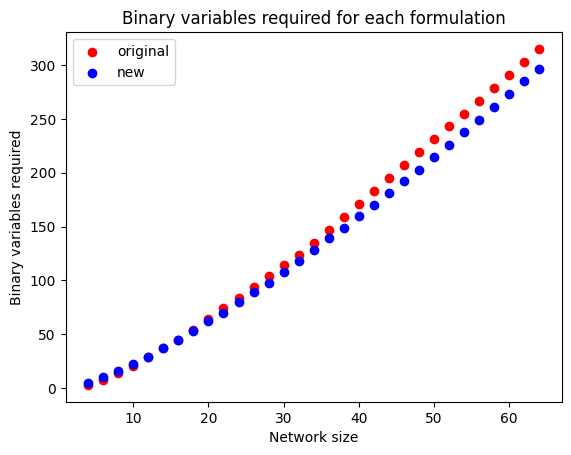

In [7]:
plt.title('Binary variables required for each formulation')
plt.xlabel('Network size')
plt.ylabel('Binary variables required')

plt.scatter(locations_array[:,0], locations_array[:,1], color='red', label='original')
plt.scatter(locations_array[:,0], locations_array[:,2], color='blue', label='new')

plt.legend()
plt.savefig(filename)
plt.show()